In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

In [3]:
from tensorflow import keras # import tensorflow.keras 

In [4]:
images = {}
for file in glob.glob("./data/*"):
    im = cv2.imread(file) # BGR
    images[file] = im

612
(640, 640, 3)


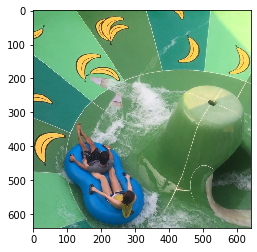

In [5]:
print(len(images.values()))
print(list(images.values())[0].shape)
plt.imshow(list(images.values())[0][:,:,[2,1,0]]) # conver to RGB


In [6]:
keys = list(images.keys())
for k in keys:
    images[k] = images[k][::8,::8,[2,1,0]]
    if images[k].shape != (80, 80, 3):
        del images[k]
    

In [7]:
images.keys()

dict_keys(['./data\\0Xf5QSSF2b.jpg', './data\\0Xh5lwSF4_.jpg', './data\\0XhcghSF4Y.jpg', './data\\B13T6qNo7Uw.jpg', './data\\B66lRUZgfFN.jpg', './data\\B7bVx9qnfTU.jpg', './data\\B7jR7nTItOb.jpg', './data\\B7kwn98AQaG.jpg', './data\\B7uftq4Amg9.jpg', './data\\B8-tgsalMz6.jpg', './data\\B80R3lgHyGw.jpg', './data\\B81RzRxgSTb.jpg', './data\\B86sKFeJFYu.jpg', './data\\B88NW8alQEr.jpg', './data\\B8BxXsWBA9d.jpg', './data\\B8cuXNpAaMf.jpg', './data\\B8eW3SBhwn9.jpg', './data\\B8pfnCJBEeU.jpg', './data\\B8rZMjfB-CW.jpg', './data\\B8uTRdgFtLP.jpg', './data\\B8wBXA_hBge.jpg', './data\\B8zhe4LgyUD.jpg', './data\\B8_hbosBJlj.jpg', './data\\B9a0IQWnY9M.jpg', './data\\B9a1B8kgwvo.jpg', './data\\B9a1XpInJDE.jpg', './data\\B9a72N7plIL.jpg', './data\\B9a8_hcA_eR.jpg', './data\\B9A9yvylJLC.jpg', './data\\B9abdWyHA6_.jpg', './data\\B9aBJTeA7fz.jpg', './data\\B9aCRcwhyPt.jpg', './data\\B9adQT4BZvl.jpg', './data\\B9aEbg3nmoa.jpg', './data\\B9Af0XJhhhr.jpg', './data\\B9aFFVKgdO5.jpg', './data\\B9aFnf3j5M_

In [8]:
X_data = []
Y_data = []
import csv
with open('./data.csv', newline='') as csvfile:
    r = csv.reader(csvfile, delimiter=',', quotechar='|')
    count = 0
    for row in r:
        if count == 0:
            print(row)
            count += 1
            continue
        
        adjusted_file_name_arr = row[3].split("/")
        adjusted_file_name = adjusted_file_name_arr[0] + "/" + adjusted_file_name_arr[1] + "\\" + adjusted_file_name_arr[2]
        target = float(row[1])/float(row[2]) # I think we flipped these. row[1] should be followers, but it is always less than likes, so I believe it's really likes. Could be wrong!
        try:
            X_data.append(images[adjusted_file_name])
            Y_data.append(target)
        except:
            print("Purged", adjusted_file_name)         


['uid', 'followers', 'likes', 'path_to_image']
Purged ./data\B9eF-jIFiXm.jpg
Purged ./data\B9aNOIFJeE_.jpg
Purged ./data\B89pjTTIw1L.jpg
Purged ./data\B9e-uJdpkjL.jpg
Purged ./data\B9Wgb3TnXcN.jpg
Purged ./data\B9NKLjdFoB8.jpg
Purged ./data\B9b5N4cH0Qb.jpg
Purged ./data\B9eV63WgHgB.jpg
Purged ./data\B9ZYOg3pFix.jpg
Purged ./data\B9aTTx7jvcG.jpg
Purged ./data\B9ecyGpHHtS.jpg
Purged ./data\B9UFzUbhqrt.jpg
Purged ./data\B9Im7XtB6Ed.jpg
Purged ./data\B9dnnWBgIH_.jpg
Purged ./data\B9YvUleiOHd.jpg
Purged ./data\B9cJH1pHjVF.jpg
Purged ./data\B9ekUG9FrMR.jpg
Purged ./data\B9PWtWSIkDP.jpg
Purged ./data\B9PMiChiUVz.jpg
Purged ./data\B9VruwlB08k.jpg
Purged ./data\B9U7LQpJCCS.jpg
Purged ./data\B9dycwpJPyv.jpg
Purged ./data\XXmLzik0UH.jpg
Purged ./data\Un6ot_OnQh.jpg
Purged ./data\B9ecyGpHHtS.jpg
Purged ./data\B9UvwVElvAE.jpg
Purged ./data\B9edl8PJxbM.jpg
Purged ./data\B9bJE_BhGo9.jpg
Purged ./data\B9ecyGpHHtS.jpg


In [9]:
len(X_data) == len(Y_data)

True

In [10]:
# INPUT SHAPE
print(X_data[0].shape)
# OUTPUT SHAPE
print(Y_data[0]) # float, likes per follower

(80, 80, 3)
0.4018087855297158


In [ ]:
plt.hist(Y_data)

(array([ 3.,  6.,  5., 16., 22., 26., 39., 65., 56., 68., 60., 70., 48.,
        37., 33., 17., 16.,  2.,  1.,  2.]),
 array([-6.10879581, -5.76108398, -5.41337214, -5.06566031, -4.71794848,
        -4.37023664, -4.02252481, -3.67481298, -3.32710115, -2.97938931,
        -2.63167748, -2.28396565, -1.93625381, -1.58854198, -1.24083015,
        -0.89311832, -0.54540648, -0.19769465,  0.15001718,  0.49772902,
         0.84544085]),
 <a list of 20 Patch objects>)

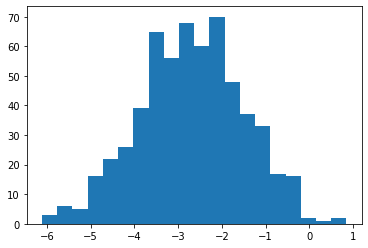

In [29]:
plt.hist(Y_data_norm, bins=20)

In [27]:
Y_data_norm = [np.log(a) for a in Y_data] # normalization
Y_data_norm_2 = [(a-min(Y_data_norm))/(max(Y_data_norm) - min(Y_data_norm)) for a in Y_data_norm]

(array([  9.,  21.,  48., 104., 124., 130.,  85.,  50.,  18.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

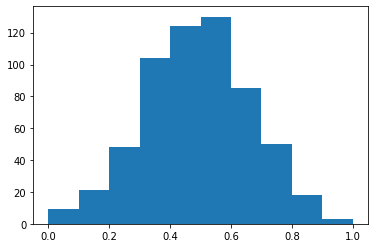

In [30]:
plt.hist(Y_data_norm_2)

In [31]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

model = keras.Sequential()

model.add(Conv2D(128, (3,3), activation="relu", input_shape=X_data[0].shape))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(.1))


#model.add(Conv2D(256, (3,3), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(.25))

#model.add(Conv2D(512, (3,3), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(.33))

model.add(Flatten())
model.add(Dense(100, activation="sigmoid"))
model.add(Dropout(.1))
model.add(Dense(1))

In [32]:
model.compile(loss=keras.losses.mean_squared_error,
             optimizer=keras.optimizers.Adam(),
             metrics=['mse'])

In [34]:
import tensorflow as tf

In [35]:
X_data = tf.cast(np.asarray(X_data), tf.float64)/255

In [36]:
X_train = X_data[20:]
Y_train = Y_data_norm_2[20:]
X_test = X_data[:20]
Y_test = Y_data_norm_2[:20]

In [38]:
model.fit(X_train, np.asarray(Y_train),
        validation_data=(np.asarray(X_test), np.asarray(Y_test)),
        batch_size = 32,
        epochs=5,
        verbose=2)

Train on 572 samples, validate on 20 samples
Epoch 1/5
572/572 - 12s - loss: 6.2963 - mse: 6.2963 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 2/5
572/572 - 12s - loss: 0.1208 - mse: 0.1208 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 3/5
572/572 - 11s - loss: 0.1042 - mse: 0.1042 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 4/5
572/572 - 11s - loss: 0.1000 - mse: 0.1000 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 5/5
572/572 - 11s - loss: 0.0990 - mse: 0.0990 - val_loss: 0.0153 - val_mse: 0.0153


0.7473166506737836


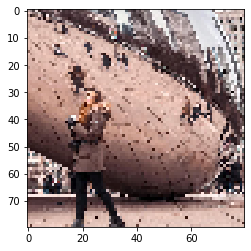

In [40]:
plt.imshow(X_test[0])
print(Y_test[0])


(array([5., 0., 5., 3., 1., 3., 1., 0., 1., 1.]),
 array([0.3581198 , 0.40369821, 0.44927663, 0.49485504, 0.54043346,
        0.58601188, 0.63159029, 0.67716871, 0.72274712, 0.76832554,
        0.81390395]),
 <a list of 10 Patch objects>)

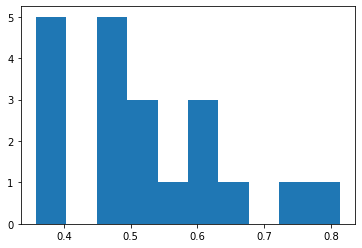

In [41]:
plt.hist(Y_test)

In [45]:
model.predict(tf.cast(np.asarray(X_test), tf.float64))

array([[0.4924631 ],
       [0.49242166],
       [0.49247205],
       [0.4902626 ],
       [0.4922192 ],
       [0.49250412],
       [0.492392  ],
       [0.49243212],
       [0.49216735],
       [0.4916084 ],
       [0.49173275],
       [0.49221072],
       [0.49240708],
       [0.4924629 ],
       [0.49235088],
       [0.49250558],
       [0.4924272 ],
       [0.49202773],
       [0.49234217],
       [0.49228403]], dtype=float32)